# Multiple Linear Regression using SciKit-Learn
----   
In this tutorial, we will learn how to fit a multiple linear regression model using the SciKit-Learn library. For a quick introduction to multiple linear regression, check out [this video](https://www.youtube.com/watch?v=1hbCJyM9ccs).   
   
Here our model is:   

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$   
   
In this case, $Y$ is the reponse variable which depends on the $p$ predictor variables.

$\beta_0$ is the intercept. This can be interpreted as the value of $Y$ when all predictor variables are equal to zero.

$\beta_j$ is the average effect on $Y$ of a one unit increase in $X_j$.

## Getting started
Same as before, we will need to import a few Python libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [229]:
df = pd.read_csv('https://raw.githubusercontent.com/James-Leslie/Learning-Library/master/ML%20for%20Actuaries/1_Linear_Regression/data/data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [230]:
df.shape

(120, 20)

Here, we see that the DataFrame contains multiple columns. We are interested in the outcome of the Rand/Dollar exchange rate variable, and would like to see if we can predict the response of this variable using the other variables as predictors.

## Let's try to model the Rand exchange rate using multiple variable linear regression      

We can do this just as easily in sk-learn as when we did single variable linear regression. The only difference this time is that our `X` variable contains multiple columns.

In [231]:
from sklearn.linear_model import LinearRegression

X = df.drop(['ZAR/USD'], axis=1)
y = df['ZAR/USD']

In [232]:
lm = LinearRegression()

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

In [235]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [236]:
b = float(lm.intercept_)

In [245]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [238]:
print("Intercept:", b)

Intercept: -1.090171803449655


In [246]:
coeff

,Coefficient
Value of Exports (USD),-0.000619
Value of Exports (ZAR),0.000074
Value of Imports (USD),-0.000545
Value of Imports (ZAR),0.000052
Total Reserves excl Gold (USD),-0.000019
IMF Reserve Position (USD),-0.003469
Foreign Exchange (USD),0.000091
Claims on Non-residents (USD),0.000013
Liabilities to Non-residents (USD),-0.000003
Central Bank Policy Rate,0.100491


## Assess the accuracy of the model

Let's assess the fit of our multi-variable model. In the previous tutorials, using just one predictor variable, we achieved mean squared error values of 2.61 and 3.04 on the training and test sets respectively.

Let's see how our new model performed!

In [248]:
from sklearn import metrics

In [249]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 0.0326535702136


In [250]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 1.68360120988


So we can see we have managed to find a much better fitting line for our data by using multiple variable regression! The training MSE is now much lower and we have almost halved the testing MSE.   

## Data visualisation using matplotlib

Let's plot the predicted vs actual values over the 10 year period for which we have data.

In [251]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

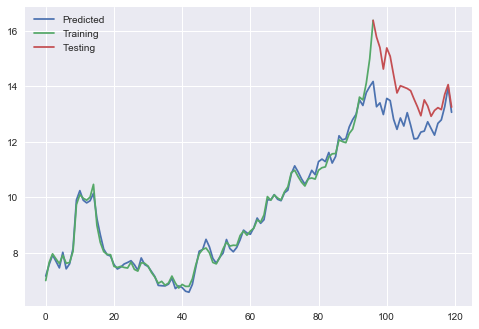

In [244]:
plt.plot(np.arange(len(y)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

----
Not bad! The blue line in the graph above shows the predicted values of the ZAR/USD exchange rate over the full 10 year period, when using multiple predictors.   
Our predictions for the training period correspond quite closely to the true values of the response variable, but the model seemed to struggle a little over the testing period.

**To summarise:**   
We learnt how to:
* use scikit-learn to perform multiple linear regression.   
* use metrics such as Mean Squared Error and adjusted $R^2$ to assess model accuracy.   
* plot the results of our model's predictions vs the true values of the response variable.   

In future tutorials, we will look at methods for improving the predictive accuracy of our model.